In [1]:
import pandas as pd
import numpy as np

# for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# for Pre-processing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# for Dimensionality reduction
from sklearn.decomposition import PCA

#for Models development 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier

#for validation
from sklearn.model_selection import cross_val_score,KFold


#for model Evaluation 
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix,classification_report,matthews_corrcoef

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data=pd.read_csv('Ov_fullprots.csv')
data

,Info_organism_id,Info_protein_id,Info_pos,Info_AA,Info_epitope_id,Info_host_id,Info_nPos,Info_nNeg,Info_type,Info_window,...,feat_BLOSUM4,feat_BLOSUM5,feat_BLOSUM6,feat_BLOSUM7,feat_BLOSUM8,feat_BLOSUM9,feat_BLOSUM10,feat_MSWHIM1,feat_MSWHIM2,feat_MSWHIM3
0,6282,CAA31690.1,1,R,NaN,NaN,0,0,NaN,RTTTMKIL,...,-0.226250,0.228750,0.303750,0.001250,-0.626250,-0.101250,-0.080000,-0.602500,0.681250,-0.225000
1,6282,CAA31690.1,2,T,NaN,NaN,0,0,NaN,RTTTMKILF,...,-0.132222,0.142222,0.302222,-0.001111,-0.545556,-0.042222,-0.214444,-0.451111,0.700000,-0.237778
2,6282,CAA31690.1,3,T,NaN,NaN,0,0,NaN,RTTTMKILFC,...,-0.038000,0.311000,0.167000,-0.075000,-0.453000,-0.050000,-0.203000,-0.472000,0.656000,-0.241000
3,6282,CAA31690.1,4,T,NaN,NaN,0,0,NaN,RTTTMKILFCL,...,-0.050000,0.285455,0.182727,-0.058182,-0.398182,-0.085455,-0.186364,-0.496364,0.661818,-0.233636
4,6282,CAA31690.1,5,M,NaN,NaN,0,0,NaN,RTTTMKILFCLL,...,-0.060000,0.264167,0.195833,-0.044167,-0.352500,-0.115000,-0.172500,-0.516667,0.666667,-0.227500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69466,6282,AAB96970.1,648,T,NaN,NaN,0,0,NaN,EEKLIVSTKKQS,...,-0.257500,0.137500,0.191667,-0.176667,-0.156667,0.286667,-0.056667,-0.465000,0.405833,-0.205000
69467,6282,AAB96970.1,649,K,NaN,NaN,0,0,NaN,EKLIVSTKKQS,...,-0.248182,0.175455,0.216364,-0.100909,-0.203636,0.242727,-0.089091,-0.529091,0.478182,-0.220000
69468,6282,AAB96970.1,650,K,NaN,NaN,0,0,NaN,KLIVSTKKQS,...,-0.237000,0.221000,0.246000,-0.010000,-0.260000,0.190000,-0.128000,-0.606000,0.565000,-0.238000
69469,6282,AAB96970.1,651,Q,NaN,NaN,0,0,NaN,LIVSTKKQS,...,-0.168889,0.154444,0.262222,-0.034444,-0.303333,0.191111,-0.047778,-0.616667,0.618889,-0.331111


In [3]:
#Check for missing values 

data.isnull().sum().sort_values(ascending=False)

Info_epitope_id     28528
Info_host_id        28528
Info_type           28528
Class               28528
Info_organism_id        0
                    ...  
feat_KF2                0
feat_KF1                0
feat_PP3                0
feat_PP2                0
feat_MSWHIM3            0
Length: 94, dtype: int64

In [4]:
# checking missing percentages 

missing_percentages = data.isnull().sum().sort_values(ascending=False) / len(data)
missing_percentages

Info_epitope_id     0.410646
Info_host_id        0.410646
Info_type           0.410646
Class               0.410646
Info_organism_id    0.000000
                      ...   
feat_KF2            0.000000
feat_KF1            0.000000
feat_PP3            0.000000
feat_PP2            0.000000
feat_MSWHIM3        0.000000
Length: 94, dtype: float64

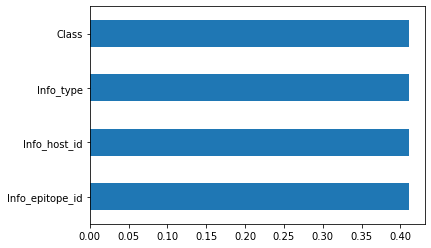

In [5]:
# visualization of null values 
missing_percentages[missing_percentages !=0].plot(kind='barh')

# making a copy of original data frame

In [6]:
df=data.copy()

In [7]:
df=df.drop("Info_organism_id", axis=1)
df=df.drop("Info_epitope_id", axis=1)
df=df.drop("Info_host_id", axis=1)
df=df.drop("Info_nPos", axis=1)
df=df.drop("Info_nNeg", axis=1)
df=df.drop("Info_type", axis=1)
df=df.drop("Info_window", axis=1)

In [8]:
df

,Info_protein_id,Info_pos,Info_AA,Info_split,Class,feat_seq_entropy,feat_C_atoms,feat_H_atoms,feat_N_atoms,feat_O_atoms,...,feat_BLOSUM4,feat_BLOSUM5,feat_BLOSUM6,feat_BLOSUM7,feat_BLOSUM8,feat_BLOSUM9,feat_BLOSUM10,feat_MSWHIM1,feat_MSWHIM2,feat_MSWHIM3
0,CAA31690.1,1,R,CV2,NaN,2.405639,41,92,12,19,...,-0.226250,0.228750,0.303750,0.001250,-0.626250,-0.101250,-0.080000,-0.602500,0.681250,-0.225000
1,CAA31690.1,2,T,CV2,NaN,2.641604,50,103,13,21,...,-0.132222,0.142222,0.302222,-0.001111,-0.545556,-0.042222,-0.214444,-0.451111,0.700000,-0.237778
2,CAA31690.1,3,T,CV2,NaN,2.846439,53,110,14,23,...,-0.038000,0.311000,0.167000,-0.075000,-0.453000,-0.050000,-0.203000,-0.472000,0.656000,-0.241000
3,CAA31690.1,4,T,CV2,NaN,2.845351,59,123,15,25,...,-0.050000,0.285455,0.182727,-0.058182,-0.398182,-0.085455,-0.186364,-0.496364,0.661818,-0.233636
4,CAA31690.1,5,M,CV2,NaN,2.792481,65,136,16,27,...,-0.060000,0.264167,0.195833,-0.044167,-0.352500,-0.115000,-0.172500,-0.516667,0.666667,-0.227500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69466,AAB96970.1,648,T,CV5,NaN,2.855389,60,130,16,32,...,-0.257500,0.137500,0.191667,-0.176667,-0.156667,0.286667,-0.056667,-0.465000,0.405833,-0.205000
69467,AAB96970.1,649,K,CV5,NaN,2.845351,55,121,15,28,...,-0.248182,0.175455,0.216364,-0.100909,-0.203636,0.242727,-0.089091,-0.529091,0.478182,-0.220000
69468,AAB96970.1,650,K,CV5,NaN,2.646439,50,112,14,24,...,-0.237000,0.221000,0.246000,-0.010000,-0.260000,0.190000,-0.128000,-0.606000,0.565000,-0.238000
69469,AAB96970.1,651,Q,CV5,NaN,2.725481,44,98,12,22,...,-0.168889,0.154444,0.262222,-0.034444,-0.303333,0.191111,-0.047778,-0.616667,0.618889,-0.331111


In [9]:
#Making copy of df file which has been removed unwanted info_ features and only left 4 info_ features
df_final=df.copy()

In [10]:
df_final

,Info_protein_id,Info_pos,Info_AA,Info_split,Class,feat_seq_entropy,feat_C_atoms,feat_H_atoms,feat_N_atoms,feat_O_atoms,...,feat_BLOSUM4,feat_BLOSUM5,feat_BLOSUM6,feat_BLOSUM7,feat_BLOSUM8,feat_BLOSUM9,feat_BLOSUM10,feat_MSWHIM1,feat_MSWHIM2,feat_MSWHIM3
0,CAA31690.1,1,R,CV2,NaN,2.405639,41,92,12,19,...,-0.226250,0.228750,0.303750,0.001250,-0.626250,-0.101250,-0.080000,-0.602500,0.681250,-0.225000
1,CAA31690.1,2,T,CV2,NaN,2.641604,50,103,13,21,...,-0.132222,0.142222,0.302222,-0.001111,-0.545556,-0.042222,-0.214444,-0.451111,0.700000,-0.237778
2,CAA31690.1,3,T,CV2,NaN,2.846439,53,110,14,23,...,-0.038000,0.311000,0.167000,-0.075000,-0.453000,-0.050000,-0.203000,-0.472000,0.656000,-0.241000
3,CAA31690.1,4,T,CV2,NaN,2.845351,59,123,15,25,...,-0.050000,0.285455,0.182727,-0.058182,-0.398182,-0.085455,-0.186364,-0.496364,0.661818,-0.233636
4,CAA31690.1,5,M,CV2,NaN,2.792481,65,136,16,27,...,-0.060000,0.264167,0.195833,-0.044167,-0.352500,-0.115000,-0.172500,-0.516667,0.666667,-0.227500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69466,AAB96970.1,648,T,CV5,NaN,2.855389,60,130,16,32,...,-0.257500,0.137500,0.191667,-0.176667,-0.156667,0.286667,-0.056667,-0.465000,0.405833,-0.205000
69467,AAB96970.1,649,K,CV5,NaN,2.845351,55,121,15,28,...,-0.248182,0.175455,0.216364,-0.100909,-0.203636,0.242727,-0.089091,-0.529091,0.478182,-0.220000
69468,AAB96970.1,650,K,CV5,NaN,2.646439,50,112,14,24,...,-0.237000,0.221000,0.246000,-0.010000,-0.260000,0.190000,-0.128000,-0.606000,0.565000,-0.238000
69469,AAB96970.1,651,Q,CV5,NaN,2.725481,44,98,12,22,...,-0.168889,0.154444,0.262222,-0.034444,-0.303333,0.191111,-0.047778,-0.616667,0.618889,-0.331111


In [11]:
Remove_feat_cols = []
for i in df_final.columns:
    if 'feat_' in i:
        Remove_feat_cols.append(i)
for i in Remove_feat_cols:
    df_final = df_final.drop(i,axis=1)


In [12]:
#This df would have only Info_ and class features
df_final

,Info_protein_id,Info_pos,Info_AA,Info_split,Class
0,CAA31690.1,1,R,CV2,NaN
1,CAA31690.1,2,T,CV2,NaN
2,CAA31690.1,3,T,CV2,NaN
3,CAA31690.1,4,T,CV2,NaN
4,CAA31690.1,5,M,CV2,NaN
...,...,...,...,...,...
69466,AAB96970.1,648,T,CV5,NaN
69467,AAB96970.1,649,K,CV5,NaN
69468,AAB96970.1,650,K,CV5,NaN
69469,AAB96970.1,651,Q,CV5,NaN


# Df_master dataframe will be used for PCA as it contents only class and Feat_

In [13]:
df_master=data.copy()
df_master

,Info_organism_id,Info_protein_id,Info_pos,Info_AA,Info_epitope_id,Info_host_id,Info_nPos,Info_nNeg,Info_type,Info_window,...,feat_BLOSUM4,feat_BLOSUM5,feat_BLOSUM6,feat_BLOSUM7,feat_BLOSUM8,feat_BLOSUM9,feat_BLOSUM10,feat_MSWHIM1,feat_MSWHIM2,feat_MSWHIM3
0,6282,CAA31690.1,1,R,NaN,NaN,0,0,NaN,RTTTMKIL,...,-0.226250,0.228750,0.303750,0.001250,-0.626250,-0.101250,-0.080000,-0.602500,0.681250,-0.225000
1,6282,CAA31690.1,2,T,NaN,NaN,0,0,NaN,RTTTMKILF,...,-0.132222,0.142222,0.302222,-0.001111,-0.545556,-0.042222,-0.214444,-0.451111,0.700000,-0.237778
2,6282,CAA31690.1,3,T,NaN,NaN,0,0,NaN,RTTTMKILFC,...,-0.038000,0.311000,0.167000,-0.075000,-0.453000,-0.050000,-0.203000,-0.472000,0.656000,-0.241000
3,6282,CAA31690.1,4,T,NaN,NaN,0,0,NaN,RTTTMKILFCL,...,-0.050000,0.285455,0.182727,-0.058182,-0.398182,-0.085455,-0.186364,-0.496364,0.661818,-0.233636
4,6282,CAA31690.1,5,M,NaN,NaN,0,0,NaN,RTTTMKILFCLL,...,-0.060000,0.264167,0.195833,-0.044167,-0.352500,-0.115000,-0.172500,-0.516667,0.666667,-0.227500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69466,6282,AAB96970.1,648,T,NaN,NaN,0,0,NaN,EEKLIVSTKKQS,...,-0.257500,0.137500,0.191667,-0.176667,-0.156667,0.286667,-0.056667,-0.465000,0.405833,-0.205000
69467,6282,AAB96970.1,649,K,NaN,NaN,0,0,NaN,EKLIVSTKKQS,...,-0.248182,0.175455,0.216364,-0.100909,-0.203636,0.242727,-0.089091,-0.529091,0.478182,-0.220000
69468,6282,AAB96970.1,650,K,NaN,NaN,0,0,NaN,KLIVSTKKQS,...,-0.237000,0.221000,0.246000,-0.010000,-0.260000,0.190000,-0.128000,-0.606000,0.565000,-0.238000
69469,6282,AAB96970.1,651,Q,NaN,NaN,0,0,NaN,LIVSTKKQS,...,-0.168889,0.154444,0.262222,-0.034444,-0.303333,0.191111,-0.047778,-0.616667,0.618889,-0.331111


# Removing  the irrelevant features from the dataset.

In [14]:
Remove_info_cols = []
for i in df_master.columns:
    if 'Info_' in i:
        Remove_info_cols.append(i)
for i in Remove_info_cols:
    df_master = df_master.drop(i,axis=1)


In [15]:
df_master

,Class,feat_seq_entropy,feat_C_atoms,feat_H_atoms,feat_N_atoms,feat_O_atoms,feat_S_atoms,feat_molecular_weight,feat_Perc_Tiny,feat_Perc_Small,...,feat_BLOSUM4,feat_BLOSUM5,feat_BLOSUM6,feat_BLOSUM7,feat_BLOSUM8,feat_BLOSUM9,feat_BLOSUM10,feat_MSWHIM1,feat_MSWHIM2,feat_MSWHIM3
0,NaN,2.405639,41,92,12,19,1,1089.30,0.375000,0.375000,...,-0.226250,0.228750,0.303750,0.001250,-0.626250,-0.101250,-0.080000,-0.602500,0.681250,-0.225000
1,NaN,2.641604,50,103,13,21,1,1254.49,0.333333,0.333333,...,-0.132222,0.142222,0.302222,-0.001111,-0.545556,-0.042222,-0.214444,-0.451111,0.700000,-0.237778
2,NaN,2.846439,53,110,14,23,2,1375.65,0.400000,0.400000,...,-0.038000,0.311000,0.167000,-0.075000,-0.453000,-0.050000,-0.203000,-0.472000,0.656000,-0.241000
3,NaN,2.845351,59,123,15,25,2,1506.82,0.363636,0.363636,...,-0.050000,0.285455,0.182727,-0.058182,-0.398182,-0.085455,-0.186364,-0.496364,0.661818,-0.233636
4,NaN,2.792481,65,136,16,27,2,1637.99,0.333333,0.333333,...,-0.060000,0.264167,0.195833,-0.044167,-0.352500,-0.115000,-0.172500,-0.516667,0.666667,-0.227500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69466,NaN,2.855389,60,130,16,32,0,1587.77,0.250000,0.333333,...,-0.257500,0.137500,0.191667,-0.176667,-0.156667,0.286667,-0.056667,-0.465000,0.405833,-0.205000
69467,NaN,2.845351,55,121,15,28,0,1440.64,0.272727,0.363636,...,-0.248182,0.175455,0.216364,-0.100909,-0.203636,0.242727,-0.089091,-0.529091,0.478182,-0.220000
69468,NaN,2.646439,50,112,14,24,0,1293.51,0.300000,0.400000,...,-0.237000,0.221000,0.246000,-0.010000,-0.260000,0.190000,-0.128000,-0.606000,0.565000,-0.238000
69469,NaN,2.725481,44,98,12,22,0,1147.32,0.333333,0.444444,...,-0.168889,0.154444,0.262222,-0.034444,-0.303333,0.191111,-0.047778,-0.616667,0.618889,-0.331111


In [16]:
#Check for missing values after removing Info_ features

df_master.isnull().sum().sort_values(ascending=False)

Class           28528
feat_ST1            0
feat_ProtFP7        0
feat_ProtFP6        0
feat_ProtFP5        0
                ...  
feat_KF7            0
feat_KF6            0
feat_KF5            0
feat_KF4            0
feat_MSWHIM3        0
Length: 83, dtype: int64

# Selecting target feature

In [17]:
x=df_master.drop(['Class'], axis=1) #axis=1 means we are working with columns and axis=0 means rows
y=df_master['Class']

In [18]:
np.unique(y)

array([-1.,  1., nan])

In [19]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69471 entries, 0 to 69470
Data columns (total 82 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   feat_seq_entropy       69471 non-null  float64
 1   feat_C_atoms           69471 non-null  int64  
 2   feat_H_atoms           69471 non-null  int64  
 3   feat_N_atoms           69471 non-null  int64  
 4   feat_O_atoms           69471 non-null  int64  
 5   feat_S_atoms           69471 non-null  int64  
 6   feat_molecular_weight  69471 non-null  float64
 7   feat_Perc_Tiny         69471 non-null  float64
 8   feat_Perc_Small        69471 non-null  float64
 9   feat_Perc_Aliphatic    69471 non-null  float64
 10  feat_Perc_Aromatic     69471 non-null  float64
 11  feat_Perc_NonPolar     69471 non-null  float64
 12  feat_Perc_Polar        69471 non-null  float64
 13  feat_Perc_Charged      69471 non-null  float64
 14  feat_Perc_Basic        69471 non-null  float64
 15  fe

# Scalling


In [20]:
scaler= StandardScaler()
x_std =scaler.fit_transform(x)

In [21]:
x_std

array([[-1.9124869 , -3.88645427, -3.86806327, ..., -1.93921074,
         1.89479541,  0.87517252],
       [-1.24141284, -2.82196085, -3.08470566, ..., -0.96925811,
         2.01019471,  0.79359643],
       [-0.65887089, -2.46712971, -2.58620536, ..., -1.10309377,
         1.73939103,  0.77302506],
       ...,
       [-1.22766182, -2.82196085, -2.44377671, ..., -1.96163533,
         1.17931981,  0.79217771],
       [-1.0028722 , -3.53162313, -3.4407773 , ..., -2.02997695,
         1.51098592,  0.19773628],
       [-1.64412867, -4.24128541, -4.36656357, ..., -1.93120196,
         1.43319825,  0.061185  ]])

# Principal Component Analysis (PCA)

In [22]:
pca=PCA()
pca.fit_transform(x_std)

array([[ 1.99419411e-01, -4.24127382e+00,  2.89928626e+00, ...,
        -3.79730485e-15, -9.07657903e-16,  8.45439588e-16],
       [-1.03992054e+00, -5.95769391e+00,  2.15884262e+00, ...,
        -1.63944614e-14,  1.70449487e-15,  5.31296738e-15],
       [-1.25899477e-01, -5.75375982e+00,  2.20525433e+00, ...,
         1.12088829e-15,  4.47594546e-16, -2.07946695e-15],
       ...,
       [-8.97396470e-02, -1.36432786e+00,  3.58233113e+00, ...,
         2.33031755e-16, -1.24686804e-16,  1.30905327e-16],
       [ 2.16035986e+00, -1.58050041e+00,  2.00524865e+00, ...,
        -6.24824469e-16, -1.04042632e-15, -1.08340777e-16],
       [ 2.22780151e+00,  4.86088346e-01,  2.67354221e+00, ...,
         1.13246122e-16,  5.04549291e-16,  1.70811582e-16]])

In [23]:
pca.explained_variance_ratio_ 

array([2.53366856e-01, 1.66985366e-01, 1.19913463e-01, 9.50537703e-02,
       7.25815617e-02, 7.08740542e-02, 3.93263662e-02, 2.88707049e-02,
       2.61038015e-02, 2.28779969e-02, 2.09786169e-02, 1.67659450e-02,
       1.48233322e-02, 1.10840257e-02, 8.69422025e-03, 8.53690185e-03,
       6.66455552e-03, 5.35640772e-03, 4.60830089e-03, 3.48058380e-03,
       2.89378486e-03, 6.22432011e-05, 4.53189174e-05, 3.74056249e-05,
       1.37641973e-05, 6.27747253e-07, 1.69885146e-08, 3.82548265e-09,
       1.95503948e-09, 8.51727336e-10, 2.85725203e-10, 1.08590308e-10,
       3.84256001e-11, 1.52199449e-13, 5.03165961e-31, 1.01760148e-31,
       9.09615062e-32, 4.46838428e-32, 4.35288462e-32, 3.93644989e-32,
       3.85060865e-32, 3.72520764e-32, 3.49805365e-32, 3.37982243e-32,
       3.19220539e-32, 3.09829635e-32, 2.85387925e-32, 2.73807435e-32,
       2.63198663e-32, 2.52365416e-32, 2.47333732e-32, 2.44450430e-32,
       2.24339623e-32, 2.12557844e-32, 2.09807523e-32, 1.94243985e-32,
      

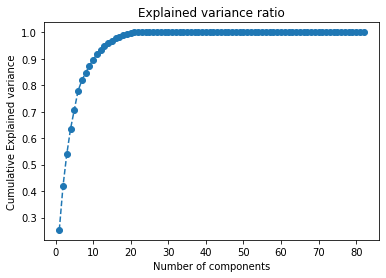

In [24]:
plt.figure(figsize=(15,15))
%matplotlib inline

plt.plot(range(1,83), pca.explained_variance_ratio_.cumsum(),marker='o', linestyle='--')
plt.title("Explained variance ratio")
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained variance')
plt.show()

The graph shows the amount of variance captured (on the y-axis) depending on the number of components we include (the x-axis). A rule of thumb is to preserve around 80 % of the variance. So, in this instance, we decide to keep 15 components.

# PCA will capture 95% infomation

In [25]:
pca=PCA(n_components=0.95)
principal_components=pca.fit_transform(x_std)

In [26]:
# Following wil tell, how many components we got, which is bascially given data columns(features)
PCA_df=pca.n_components_
PCA_df

14

In [27]:
principal_df = pd.DataFrame(data=principal_components , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5','principal component 6','principal component 7','principal component 8','principal component 9','principal component 10','principal component 11','principal component 12','principal component 13','principal component 14'])


In [28]:
principal_df

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,principal component 12,principal component 13,principal component 14
0,0.199419,-4.241274,2.899286,-4.902793,5.225143,-0.815540,2.936371,-0.679875,0.700705,-3.008036,4.399110,6.569151,4.738415,2.635947
1,-1.039921,-5.957694,2.158843,-2.367265,3.740719,-1.251482,2.420193,-1.534622,0.239206,-2.867819,4.417127,5.236887,4.111172,1.881783
2,-0.125899,-5.753760,2.205254,-1.249236,4.039611,-2.365593,4.855997,-0.783971,-0.676775,-2.840400,3.091198,3.917287,3.865224,1.288044
3,-0.128346,-6.913525,1.684375,-1.916110,2.925228,-1.706303,4.248088,-0.635577,-0.838315,-2.745072,2.698263,2.771102,3.171571,1.633999
4,-0.199482,-7.891106,1.236376,-2.478815,1.990287,-1.134422,3.696741,-0.517789,-0.962656,-2.684582,2.265800,1.687132,2.556596,1.895824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69466,-2.239852,1.560795,0.861016,-5.244121,1.257521,1.335306,-0.265738,-1.299512,0.931146,-1.475687,1.844780,3.741690,0.736873,0.231620
69467,-1.228494,0.216212,2.106310,-5.538920,2.408920,0.937353,-0.418205,-1.219823,0.956900,-1.749344,2.896841,4.565434,1.051494,0.114500
69468,-0.089740,-1.364328,3.582331,-5.910269,3.776620,0.526732,-0.658605,-1.163416,1.066645,-2.112556,4.068719,5.439282,1.511800,-0.087320
69469,2.160360,-1.580500,2.005249,-5.681660,4.231199,-0.006912,-0.351459,-1.101462,1.417120,-1.693394,4.413402,6.067869,2.291924,0.200912


In [29]:
pca.components_

array([[-0.01587075, -0.14173059, -0.13735531, ..., -0.11692332,
         0.01017886, -0.16495283],
       [-0.05928078, -0.12782496, -0.10906417, ...,  0.05661605,
        -0.2003345 , -0.03351423],
       [-0.04535213, -0.05205767,  0.00568611, ..., -0.0436193 ,
        -0.00485878,  0.12892684],
       ...,
       [-0.14269361, -0.21708914, -0.29067696, ..., -0.01968168,
        -0.00323159, -0.03645152],
       [-0.37425438, -0.15803687, -0.20591151, ...,  0.02211798,
        -0.01790336,  0.17237828],
       [ 0.08673006, -0.03795964, -0.02523391, ..., -0.0603515 ,
         0.06277214, -0.04223625]])

In [30]:
pca.explained_variance_ratio_ 

array([0.25336686, 0.16698537, 0.11991346, 0.09505377, 0.07258156,
       0.07087405, 0.03932637, 0.0288707 , 0.0261038 , 0.022878  ,
       0.02097862, 0.01676594, 0.01482333, 0.01108403])

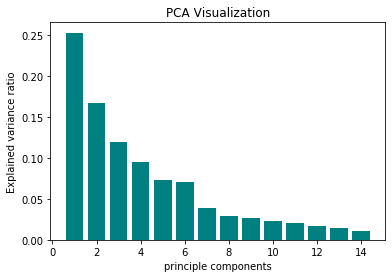

In [31]:
#Visualization of explained variance ratio

%matplotlib inline
plt.bar(range(1,15), pca.explained_variance_ratio_, color='teal')
plt.title("PCA Visualization")
plt.xlabel('principle components')
plt.ylabel('Explained variance ratio')
plt.show()

In [32]:
final_df= pd.concat([df_final, principal_df],axis=1)

In [33]:
final_df

,Info_protein_id,Info_pos,Info_AA,Info_split,Class,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,principal component 12,principal component 13,principal component 14
0,CAA31690.1,1,R,CV2,NaN,0.199419,-4.241274,2.899286,-4.902793,5.225143,-0.815540,2.936371,-0.679875,0.700705,-3.008036,4.399110,6.569151,4.738415,2.635947
1,CAA31690.1,2,T,CV2,NaN,-1.039921,-5.957694,2.158843,-2.367265,3.740719,-1.251482,2.420193,-1.534622,0.239206,-2.867819,4.417127,5.236887,4.111172,1.881783
2,CAA31690.1,3,T,CV2,NaN,-0.125899,-5.753760,2.205254,-1.249236,4.039611,-2.365593,4.855997,-0.783971,-0.676775,-2.840400,3.091198,3.917287,3.865224,1.288044
3,CAA31690.1,4,T,CV2,NaN,-0.128346,-6.913525,1.684375,-1.916110,2.925228,-1.706303,4.248088,-0.635577,-0.838315,-2.745072,2.698263,2.771102,3.171571,1.633999
4,CAA31690.1,5,M,CV2,NaN,-0.199482,-7.891106,1.236376,-2.478815,1.990287,-1.134422,3.696741,-0.517789,-0.962656,-2.684582,2.265800,1.687132,2.556596,1.895824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69466,AAB96970.1,648,T,CV5,NaN,-2.239852,1.560795,0.861016,-5.244121,1.257521,1.335306,-0.265738,-1.299512,0.931146,-1.475687,1.844780,3.741690,0.736873,0.231620
69467,AAB96970.1,649,K,CV5,NaN,-1.228494,0.216212,2.106310,-5.538920,2.408920,0.937353,-0.418205,-1.219823,0.956900,-1.749344,2.896841,4.565434,1.051494,0.114500
69468,AAB96970.1,650,K,CV5,NaN,-0.089740,-1.364328,3.582331,-5.910269,3.776620,0.526732,-0.658605,-1.163416,1.066645,-2.112556,4.068719,5.439282,1.511800,-0.087320
69469,AAB96970.1,651,Q,CV5,NaN,2.160360,-1.580500,2.005249,-5.681660,4.231199,-0.006912,-0.351459,-1.101462,1.417120,-1.693394,4.413402,6.067869,2.291924,0.200912


Here PCA has selcted 14 features . All these  features are computed column. They are the new feature, so that now we can use this features for further pre-processing. Next use train-test split once again, but this time I wll supply new DataFrame(pca)

# Tsfresh approch for feature engineering in series-based data

To install tsfresh package first we need to install conda package on conda-forge using --> conda install -c conda-forge tsfresh

In [34]:
#!pip install tsfresh

In [35]:
df_tfresh=final_df.copy()
df_tfresh

,Info_protein_id,Info_pos,Info_AA,Info_split,Class,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,principal component 12,principal component 13,principal component 14
0,CAA31690.1,1,R,CV2,NaN,0.199419,-4.241274,2.899286,-4.902793,5.225143,-0.815540,2.936371,-0.679875,0.700705,-3.008036,4.399110,6.569151,4.738415,2.635947
1,CAA31690.1,2,T,CV2,NaN,-1.039921,-5.957694,2.158843,-2.367265,3.740719,-1.251482,2.420193,-1.534622,0.239206,-2.867819,4.417127,5.236887,4.111172,1.881783
2,CAA31690.1,3,T,CV2,NaN,-0.125899,-5.753760,2.205254,-1.249236,4.039611,-2.365593,4.855997,-0.783971,-0.676775,-2.840400,3.091198,3.917287,3.865224,1.288044
3,CAA31690.1,4,T,CV2,NaN,-0.128346,-6.913525,1.684375,-1.916110,2.925228,-1.706303,4.248088,-0.635577,-0.838315,-2.745072,2.698263,2.771102,3.171571,1.633999
4,CAA31690.1,5,M,CV2,NaN,-0.199482,-7.891106,1.236376,-2.478815,1.990287,-1.134422,3.696741,-0.517789,-0.962656,-2.684582,2.265800,1.687132,2.556596,1.895824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69466,AAB96970.1,648,T,CV5,NaN,-2.239852,1.560795,0.861016,-5.244121,1.257521,1.335306,-0.265738,-1.299512,0.931146,-1.475687,1.844780,3.741690,0.736873,0.231620
69467,AAB96970.1,649,K,CV5,NaN,-1.228494,0.216212,2.106310,-5.538920,2.408920,0.937353,-0.418205,-1.219823,0.956900,-1.749344,2.896841,4.565434,1.051494,0.114500
69468,AAB96970.1,650,K,CV5,NaN,-0.089740,-1.364328,3.582331,-5.910269,3.776620,0.526732,-0.658605,-1.163416,1.066645,-2.112556,4.068719,5.439282,1.511800,-0.087320
69469,AAB96970.1,651,Q,CV5,NaN,2.160360,-1.580500,2.005249,-5.681660,4.231199,-0.006912,-0.351459,-1.101462,1.417120,-1.693394,4.413402,6.067869,2.291924,0.200912


In [36]:
# Converting string to float so that data could be fit on for scaling
le = LabelEncoder()
df_tfresh['Info_protein_id']=le.fit_transform(df_tfresh['Info_protein_id'])
df_tfresh['Info_AA']=le.fit_transform(df_tfresh['Info_AA'])
df_tfresh['Info_split']=le.fit_transform(df_tfresh['Info_split'])

In [48]:
df_tfresh

,Info_protein_id,Info_pos,Info_AA,Info_split,Class,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,principal component 12,principal component 13,principal component 14
0,166,1,14,1,NaN,0.199419,-4.241274,2.899286,-4.902793,5.225143,-0.815540,2.936371,-0.679875,0.700705,-3.008036,4.399110,6.569151,4.738415,2.635947
1,166,2,16,1,NaN,-1.039921,-5.957694,2.158843,-2.367265,3.740719,-1.251482,2.420193,-1.534622,0.239206,-2.867819,4.417127,5.236887,4.111172,1.881783
2,166,3,16,1,NaN,-0.125899,-5.753760,2.205254,-1.249236,4.039611,-2.365593,4.855997,-0.783971,-0.676775,-2.840400,3.091198,3.917287,3.865224,1.288044
3,166,4,16,1,NaN,-0.128346,-6.913525,1.684375,-1.916110,2.925228,-1.706303,4.248088,-0.635577,-0.838315,-2.745072,2.698263,2.771102,3.171571,1.633999
4,166,5,10,1,NaN,-0.199482,-7.891106,1.236376,-2.478815,1.990287,-1.134422,3.696741,-0.517789,-0.962656,-2.684582,2.265800,1.687132,2.556596,1.895824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69466,139,648,16,4,NaN,-2.239852,1.560795,0.861016,-5.244121,1.257521,1.335306,-0.265738,-1.299512,0.931146,-1.475687,1.844780,3.741690,0.736873,0.231620
69467,139,649,8,4,NaN,-1.228494,0.216212,2.106310,-5.538920,2.408920,0.937353,-0.418205,-1.219823,0.956900,-1.749344,2.896841,4.565434,1.051494,0.114500
69468,139,650,8,4,NaN,-0.089740,-1.364328,3.582331,-5.910269,3.776620,0.526732,-0.658605,-1.163416,1.066645,-2.112556,4.068719,5.439282,1.511800,-0.087320
69469,139,651,13,4,NaN,2.160360,-1.580500,2.005249,-5.681660,4.231199,-0.006912,-0.351459,-1.101462,1.417120,-1.693394,4.413402,6.067869,2.291924,0.200912


In [37]:
x=df_tfresh.drop(['Class'], axis=1) #axis=1 means we are working with columns and axis=0 means rows
y=df_tfresh['Class']

In [38]:
# x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.20, random_state=42)
# print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

In [39]:
#!pip install --user sktime

In [40]:
from tsfresh.feature_extraction import ComprehensiveFCParameters
from tsfresh import extract_relevant_features
from tsfresh import extract_features
#from sktime.transformations.panel.tsfresh import TSFreshFeatureExtractor

In [50]:
#!pip install --user statsmodels==0.12.1

  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.2
    Uninstalling statsmodels-0.13.2:


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\users\\200282187\\appdata\\roaming\\python\\python37\\site-packages\\statsmodels\\tsa\\_innovations.cp37-win_amd64.pyd'
Check the permissions.



In [49]:
features = extract_features(x, column_id="Info_protein_id", column_sort="Info_pos" , column_kind=None, column_value=None)

Feature Extraction:   0%|          | 0/15 [00:00<?, ?it/s]

TypeError: acf() got an unexpected keyword argument 'unbiased'

In [42]:
# sktime approch
#from sktime.transformations.panel.tsfresh import TSFreshFeatureExtractor

# TSF = TSFreshFeatureExtractor(default_fc_parameters="efficient", show_warnings=False)
# Xt = TSF.fit_transform(x_train)
# Xt.head()

In [43]:
# scaler= StandardScaler()
# x_TsFresh_std=scaler.fit_transform(x)

In [44]:
#settings = ComprehensiveFCParameters()

In [45]:
#from tsfresh.feature_extraction import extract_features

In [46]:
#extract_features(df_tfresh, default_fc_parameters=settings)

In [47]:
#featues = extract_relevant_features(df_tfresh,y,column_id="Info_protein_id",column_sort="Info_pos")